In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

(569, 30)

In [ ]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
breast_labels = breast.target
breast_labels.shape

(569,)

In [ ]:
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [ ]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
X = breast_dataset.values[:,0:30]
print('X =', X[0:5])
Y = breast_dataset.values[:,30]
print('Y =', Y[0:5])

X = [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2

In [ ]:
# Using SVM Classifier with the linear kernal at different principal components and storing them to be plotted later. 

Prin_Comp = []
Precision_0 = []
Precision_1 = []
Recall_0 = []
Recall_1 = []
Accuracy = []
max_accuracy = 0
high_comp = 0
 
N_Comp = range(1,30)
for N in N_Comp:
    Prin_Comp.append(N)
    pca = PCA(n_components = N)
    principalComponents = pca.fit_transform(X)
    principalDF = pd.DataFrame(data = principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalDF, Y, test_size=0.2, random_state = 0)
    sc_X = StandardScaler()
    X_train_sc = sc_X.fit_transform(X_train)
    X_test_sc = sc_X.fit_transform(X_test)
    model = SVC(kernel = 'linear', C = 0.01)
    model.fit(X_train_sc, Y_train)
    predicted = model.predict(X_test_sc)
    matrix = confusion_matrix(Y_test, predicted)
    report = classification_report(Y_test, predicted)
    report_data = classification_report(Y_test, predicted, output_dict=True)
    data = pd.DataFrame(report_data)
    Precision_0.append(data.values[0,0])
    Precision_1.append(data.values[0,1])
    Recall_0.append(data.values[1,0])
    Recall_1.append(data.values[1,1])
    Accuracy.append(data.values[0,2])
    if data.values[0,2] > max_accuracy:
        high_comp = N
        max_accuracy = data.values[0,2]

# Latest Confusion Matrix and Classification Report
print("Confusion Matrix: \n",matrix)
print("\n")
print("Classification Report: \n", report)

Confusion Matrix: 
 [[38  9]
 [ 0 67]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.81      0.89        47
         1.0       0.88      1.00      0.94        67

    accuracy                           0.92       114
   macro avg       0.94      0.90      0.92       114
weighted avg       0.93      0.92      0.92       114



In [ ]:
print("The N of principal components with the highest accuracy is:", high_comp, "components with the accuracy of", max_accuracy)

The N of principal components with the highest accuracy is: 22 components with the accuracy of 0.9298245614035088


Using Linear Kernal:


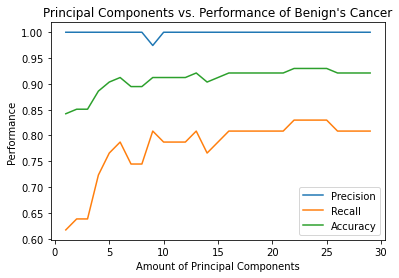

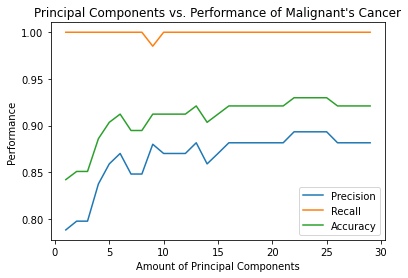

In [ ]:
print("Using Linear Kernal:")
plt.plot(Prin_Comp, Precision_0, label = "Precision")
plt.plot(Prin_Comp, Recall_0, label = "Recall")
plt.plot(Prin_Comp, Accuracy, label = "Accuracy")
plt.title("Principal Components vs. Performance of Benign's Cancer")
plt.xlabel("Amount of Principal Components")
plt.ylabel("Performance")
plt.legend()
plt.show()
plt.plot(Prin_Comp, Precision_1, label = "Precision")
plt.plot(Prin_Comp, Recall_1, label = "Recall")
plt.plot(Prin_Comp, Accuracy, label = "Accuracy")
plt.title("Principal Components vs. Performance of Malignant's Cancer")
plt.xlabel("Amount of Principal Components")
plt.ylabel("Performance")
plt.legend()
plt.show()

In [ ]:
# Using SVM Classifier with the poly kernal at different principal components and storing them to be plotted later. 

Prin_Comp = []
Precision_0 = []
Precision_1 = []
Recall_0 = []
Recall_1 = []
Accuracy = []
max_accuracy = 0
high_comp = 0
 
N_Comp = range(1,30)
for N in N_Comp:
    Prin_Comp.append(N)
    pca = PCA(n_components = N)
    principalComponents = pca.fit_transform(X)
    principalDF = pd.DataFrame(data = principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalDF, Y, test_size=0.2, random_state = 0)
    sc_X = StandardScaler()
    X_train_sc = sc_X.fit_transform(X_train)
    X_test_sc = sc_X.fit_transform(X_test)
    model = SVC(kernel = 'poly', C = 0.1, degree = 15)
    model.fit(X_train_sc, Y_train)
    predicted = model.predict(X_test_sc)
    matrix = confusion_matrix(Y_test, predicted)
    report = classification_report(Y_test, predicted)
    report_data = classification_report(Y_test, predicted, output_dict=True)
    data = pd.DataFrame(report_data)
    Precision_0.append(data.values[0,0])
    Precision_1.append(data.values[0,1])
    Recall_0.append(data.values[1,0])
    Recall_1.append(data.values[1,1])
    Accuracy.append(data.values[0,2])
    if data.values[0,2] > max_accuracy:
        high_comp = N
        max_accuracy = data.values[0,2]

# Latest Confusion Matrix and Classification Report
print("Confusion Matrix: \n",matrix)
print("\n")
print("Classification Report: \n", report)

Confusion Matrix: 
 [[ 1 46]
 [ 0 67]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.02      0.04        47
         1.0       0.59      1.00      0.74        67

    accuracy                           0.60       114
   macro avg       0.80      0.51      0.39       114
weighted avg       0.76      0.60      0.45       114



In [ ]:
print("The N of principal components with the highest accuracy is:", high_comp, "components with the accuracy of", max_accuracy)

The N of principal components with the highest accuracy is: 1 components with the accuracy of 0.7807017543859649


Using Polynomial Kernal:


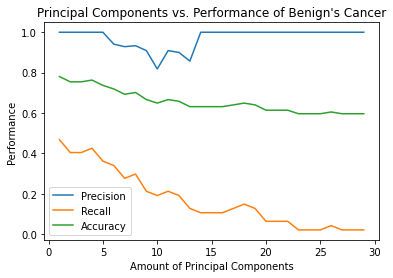

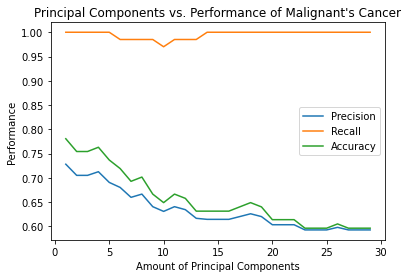

In [ ]:
print("Using Polynomial Kernal:")
plt.plot(Prin_Comp, Precision_0, label = "Precision")
plt.plot(Prin_Comp, Recall_0, label = "Recall")
plt.plot(Prin_Comp, Accuracy, label = "Accuracy")
plt.title("Principal Components vs. Performance of Benign's Cancer")
plt.xlabel("Amount of Principal Components")
plt.ylabel("Performance")
plt.legend()
plt.show()
plt.plot(Prin_Comp, Precision_1, label = "Precision")
plt.plot(Prin_Comp, Recall_1, label = "Recall")
plt.plot(Prin_Comp, Accuracy, label = "Accuracy")
plt.title("Principal Components vs. Performance of Malignant's Cancer")
plt.xlabel("Amount of Principal Components")
plt.ylabel("Performance")
plt.legend()
plt.show()

In [ ]:
# Using SVM Classifier with the rbf kernal at different principal components and storing them to be plotted later. 

Prin_Comp = []
Precision_0 = []
Precision_1 = []
Recall_0 = []
Recall_1 = []
Accuracy = []
max_accuracy = 0
high_comp = 0
 
N_Comp = range(1,30)
for N in N_Comp:
    Prin_Comp.append(N)
    pca = PCA(n_components = N)
    principalComponents = pca.fit_transform(X)
    principalDF = pd.DataFrame(data = principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalDF, Y, test_size=0.2, random_state = 0)
    sc_X = StandardScaler()
    X_train_sc = sc_X.fit_transform(X_train)
    X_test_sc = sc_X.fit_transform(X_test)
    model = SVC(kernel = 'rbf', C = 10, gamma = 0.01)
    model.fit(X_train_sc, Y_train)
    predicted = model.predict(X_test_sc)
    matrix = confusion_matrix(Y_test, predicted)
    report = classification_report(Y_test, predicted)
    report_data = classification_report(Y_test, predicted, output_dict=True)
    data = pd.DataFrame(report_data)
    Precision_0.append(data.values[0,0])
    Precision_1.append(data.values[0,1])
    Recall_0.append(data.values[1,0])
    Recall_1.append(data.values[1,1])
    Accuracy.append(data.values[0,2])
    if data.values[0,2] > max_accuracy:
        high_comp = N
        max_accuracy = data.values[0,2]

# Latest Confusion Matrix and Classification Report
print("Confusion Matrix: \n",matrix)
print("\n")
print("Classification Report: \n", report)

Confusion Matrix: 
 [[44  3]
 [ 0 67]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        47
         1.0       0.96      1.00      0.98        67

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
print("The N of principal components with the highest accuracy is:", high_comp, "components with the accuracy of", max_accuracy)

The N of principal components with the highest accuracy is: 21 components with the accuracy of 0.9736842105263158


Using Guassian Radial Basis Function Kernal:


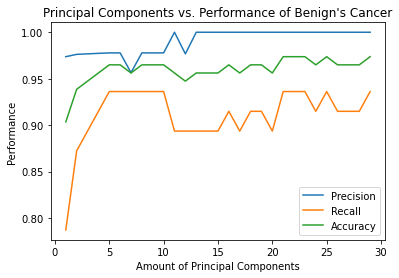

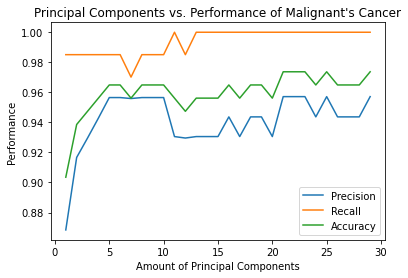

In [ ]:
print("Using Guassian Radial Basis Function Kernal:")
plt.plot(Prin_Comp, Precision_0, label = "Precision")
plt.plot(Prin_Comp, Recall_0, label = "Recall")
plt.plot(Prin_Comp, Accuracy, label = "Accuracy")
plt.title("Principal Components vs. Performance of Benign's Cancer")
plt.xlabel("Amount of Principal Components")
plt.ylabel("Performance")
plt.legend()
plt.show()
plt.plot(Prin_Comp, Precision_1, label = "Precision")
plt.plot(Prin_Comp, Recall_1, label = "Recall")
plt.plot(Prin_Comp, Accuracy, label = "Accuracy")
plt.title("Principal Components vs. Performance of Malignant's Cancer")
plt.xlabel("Amount of Principal Components")
plt.ylabel("Performance")
plt.legend()
plt.show()